In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

maang_data_path= "combined_file.csv"

maang_df= pd.read_csv(maang_data_path)

btc_data_path= "BTC.csv"
btc_df= pd.read_csv(btc_data_path)

doge_data_path= "DOGE-USD.csv"
doge_df= pd.read_csv(doge_data_path)

#Remove additional header rows from MAANG file
value_to_remove = 'Name'
maang_df = maang_df[maang_df['Name'] != value_to_remove]
maang_df.head()
#Reformat BTC file to align with MAANG file
btc_name = "BTC"
btc_df['Name'] = btc_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
btc_df = btc_df.reindex(columns=column_order)
btc_df.head()

#Reformat DOGE file to align with MAANG file
doge_name = "DOGE"
doge_df['Name'] = doge_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
doge_df = doge_df.reindex(columns=column_order)
doge_df.head()


combine= [maang_df, btc_df, doge_df]
combine_df= pd.concat(combine)
combine_df['Date']= pd.to_datetime(combine_df["Date"])
combine_df.head()

#Drop NA values
clean_combined_df = combine_df.dropna()

clean_combined_df









C:\Users\khoi\AppData\Local\Temp\ipykernel_19436\1166985373.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combine_df['Date']= pd.to_datetime(combine_df["Date"])


,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,AMZN,2018-07-30,91.366501,91.474998,88.301003,88.960999,88.960999,131246000
1,AMZN,2018-07-31,89.324501,90.091499,86.966003,88.872002,88.872002,114774000
2,AMZN,2018-01-08,89.199997,89.921997,88.801003,89.858498,89.858498,83062000
3,AMZN,2018-02-08,89.438499,91.828003,89.300003,91.716499,91.716499,87094000
4,AMZN,2018-03-08,91.887001,92.050003,91.074997,91.164497,91.164497,69210000
...,...,...,...,...,...,...,...,...
2089,DOGE,2023-07-30,0.08019,0.080439,0.077039,0.078061,0.078061,436209339.0
2090,DOGE,2023-07-31,0.078063,0.079656,0.0771,0.077818,0.077818,346973531.0
2091,DOGE,2023-08-01,0.077824,0.078168,0.076043,0.078042,0.078042,369078156.0
2092,DOGE,2023-08-02,0.078038,0.078195,0.0741,0.074213,0.074213,364508311.0


In [5]:
#Reformat BTC file to align with MAANG file
btc_name = "BTC"
btc_df['Name'] = btc_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
btc_df = btc_df.reindex(columns=column_order)
btc_df.head()

#Reformat DOGE file to align with MAANG file
doge_name = "DOGE"
doge_df['Name'] = doge_name
column_order = ['Name', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
doge_df = doge_df.reindex(columns=column_order)
doge_df.head()

,Name,Date,Open,High,Low,Close,Adj Close,Volume
0,DOGE,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,DOGE,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,DOGE,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,DOGE,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,DOGE,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0


In [12]:
stocks_volume= clean_combined_df.groupby(["Name"])["Volume"].max()
stocks_volume.head()



Name
AAPL          99890800
AMZN          99940000
BTC     118992465607.0
DOGE     69410680685.0
GOOG          97798600
Name: Volume, dtype: object

In [13]:
# Bitcoin

btc_max= btc_df.loc[btc_df["Name"] == "BTC"].max()




#Doge

doge_max= doge_df.loc[doge_df["Name"]=="DOGE"].max()


#AMZN

amzn_max= clean_combined_df.loc[clean_combined_df["Name"]=="AMZN"].max()

# AAPL

aapl_max= clean_combined_df.loc[clean_combined_df["Name"]=="AAPL"].max()

# GOOG

goog_max= clean_combined_df.loc[clean_combined_df["Name"]=="GOOG"].max()

# META

meta_max= clean_combined_df.loc[clean_combined_df["Name"]=="META"].max()

# MSFT

msft_max= clean_combined_df.loc[clean_combined_df["Name"]=="MSFT"].max()

# NFLX 

nflx_max= clean_combined_df.loc[clean_combined_df["Name"]=="NFLX"].max()

# NVDA

nvda_max= clean_combined_df.loc[clean_combined_df["Name"]=="NVDA"].max()

summary_high= pd.DataFrame({"DOGE":doge_max,"Bitcoin":btc_max, "Amazon": amzn_max, "Apple": aapl_max, "Google": goog_max, "Meta": meta_max, "Microsoft":msft_max, "NetFlix": nflx_max, "NVIDIA": nvda_max})

summary_high






,DOGE,Bitcoin,Amazon,Apple,Google,Meta,Microsoft,NetFlix,NVIDIA
Name,DOGE,BTC,AMZN,AAPL,GOOG,META,MSFT,NFLX,NVDA
Date,2023-08-04,2023-08-04,2023-12-07 00:00:00,2023-12-07 00:00:00,2023-12-07 00:00:00,2023-12-07 00:00:00,2023-12-07 00:00:00,2023-12-07 00:00:00,2023-12-07 00:00:00
Open,0.687801,31474.720703,99.999496,99.172501,99.910004,99.580002,99.720001,692.349976,99.9375
High,0.737567,31814.515625,99.934502,99.955002,99.989998,99.32,97.970001,700.98999,99.087502
Low,0.608168,30659.355469,99.880997,96.7425,99.989998,97.510002,99.519997,686.090027,99.654999
Close,0.684777,31476.048828,99.919998,98.357498,99.870003,99.199997,98.230003,691.690002,98.717499
Adj Close,0.684777,31476.048828,99.919998,96.567558,99.870003,99.199997,99.949966,691.690002,98.453735
Volume,69410680685.0,118992465607.0,99940000,99890800,97798600,9973700,97012700,9991100,99986800


In [17]:
# Bitcoin

btc_min= btc_df.loc[btc_df["Name"] == "BTC"].min()




#Doge

doge_min= doge_df.loc[doge_df["Name"]=="DOGE"].min()


#AMZN

amzn_min= clean_combined_df.loc[clean_combined_df["Name"]=="AMZN"].min()

# AAPL

aapl_min= clean_combined_df.loc[clean_combined_df["Name"]=="AAPL"].min()

# GOOG

goog_min= clean_combined_df.loc[clean_combined_df["Name"]=="GOOG"].min()

# META

meta_min= clean_combined_df.loc[clean_combined_df["Name"]=="META"].min()

# MSFT

msft_min= clean_combined_df.loc[clean_combined_df["Name"]=="MSFT"].min()

# NFLX 

nflx_min= clean_combined_df.loc[clean_combined_df["Name"]=="NFLX"].min()

# NVDA

nvda_min= clean_combined_df.loc[clean_combined_df["Name"]=="NVDA"].min()

summary_low= pd.DataFrame({"DOGE":doge_min,"Bitcoin":btc_min, "Amazon": amzn_min, "Apple": aapl_min, "Google": goog_min, "Meta": meta_min, "Microsoft":msft_min, "NetFlix": nflx_min, "NVIDIA": nvda_min})

summary_low


,DOGE,Bitcoin,Amazon,Apple,Google,Meta,Microsoft,NetFlix,NVIDIA
Name,DOGE,BTC,AMZN,AAPL,GOOG,META,MSFT,NFLX,NVDA
Date,2017-11-09,2022-08-04,2018-01-08 00:00:00,2018-01-08 00:00:00,2018-01-08 00:00:00,2018-01-08 00:00:00,2018-01-08 00:00:00,2018-01-08 00:00:00,2018-01-08 00:00:00
Open,0.001046,15782.300781,100,102.885002,100.059998,101.720001,100.099998,163.960007,100.150002
High,0.00121,16253.047852,100,106.415001,100.110001,100.849998,100.190002,172.059998,100.699997
Low,0.001002,15599.046875,100.012497,100.824997,100.100998,100.739998,100.110001,162.710007,100.25
Close,0.001038,15787.28418,100.040001,106.260002,100,101.470001,100.389999,166.369995,100.522499
Adj Close,0.001038,15787.28418,100.040001,104.326248,100,101.470001,100.093002,166.369995,100.253914
Volume,1431720.0,6481775959.0,100212000,100077900,102612000,10015300,10550600,10013900,100258000


In [75]:
sorted_data = doge_df.sort_values(by='Volume', ascending=False)
N = 5  # Number of top days you want to display
top_days = sorted_data.head(5)
top_days





,Name,Date,Open,High,Low,Close,Adj Close,Volume
1254,DOGE,2021-04-16,0.181587,0.437700,0.180488,0.365870,0.365870,6.941068e+10
1277,DOGE,2021-05-09,0.635820,0.697625,0.425706,0.570070,0.570070,4.613806e+10
1273,DOGE,2021-05-05,0.537355,0.695262,0.523822,0.657633,0.657633,4.252510e+10
1272,DOGE,2021-05-04,0.440274,0.605998,0.400800,0.541334,0.541334,3.823813e+10
1255,DOGE,2021-04-17,0.366098,0.374455,0.236524,0.284173,0.284173,3.141340e+10


In [74]:
sorted_btc = btc_df.sort_values(by='Volume', ascending=False)
N = 5  # Number of top days you want to display
btc_topdays = sorted_btc.head(5)
btc_topdays



,Name,Date,Open,High,Low,Close,Adj Close,Volume
96,BTC,2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,1.189925e+11
97,BTC,2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,1.029052e+11
98,BTC,2022-11-10,15883.158203,18054.312500,15834.018555,17586.771484,17586.771484,8.320228e+10
92,BTC,2022-11-04,20208.769531,21209.560547,20188.019531,21147.230469,21147.230469,6.407273e+10
83,BTC,2022-10-26,20092.236328,20938.134766,20076.117188,20770.441406,20770.441406,5.889595e+10


In [71]:
sorted_aapl =clean_combined_df.loc[clean_combined_df["Name"]=="AAPL"].sort_values(by='Volume', ascending=False)
N = 5  # Number of top days you want to display
aapl_topdays = sorted_aapl.head(N)
aapl_topdays



,Name,Date,Open,High,Low,Close,Adj Close,Volume
8295,AAPL,2021-09-07,142.75,145.649994,142.649994,145.110001,143.429214,99890800
8771,AAPL,2023-05-31,177.330002,179.350006,176.759995,177.25,177.25,99625300
8100,AAPL,2020-09-29,114.550003,115.309998,113.57,114.089996,112.215721,99382200
8419,AAPL,2022-04-01,182.630005,182.940002,179.119995,179.699997,178.144287,99310400
7705,AAPL,2019-07-03,43.467499,43.610001,43.005001,43.125,41.68034,99185600


In [72]:
aapl_highest= aapl_topdays.groupby(["Date"])["Volume"].max()
aapl_highest

Date
2019-07-03    99185600
2020-09-29    99382200
2021-09-07    99890800
2022-04-01    99310400
2023-05-31    99625300
Name: Volume, dtype: object

Text(0, 0.5, 'Volume')

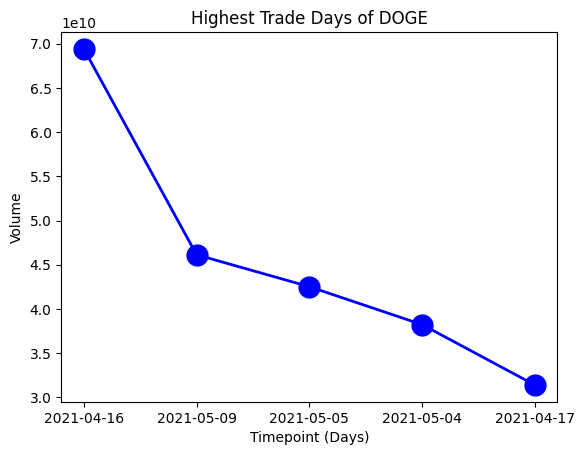

In [53]:
forline_df = top_days.loc[top_days["Name"] == "DOGE"]
forline_df.head()
x_axis = forline_df["Date"]
tumsiz = forline_df["Volume"]
fig1, ax1 = plt.subplots()
plt.title('Highest Trade Days of DOGE')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Volume')

In [76]:
sorted_nvda =clean_combined_df.loc[clean_combined_df["Name"]=="NVDA"].sort_values(by='Volume', ascending=False)
N = 5  # Number of top days you want to display
nvda_topdays = sorted_nvda.head(N)
nvda_topdays

,Name,Date,Open,High,Low,Close,Adj Close,Volume
3038,NVDA,2020-08-21,122.017502,128.087494,121.952499,126.834999,126.496094,99986800
3482,NVDA,2022-05-26,160.360001,180.919998,160.220001,178.509995,178.324844,99657500
2970,NVDA,2020-05-15,78.897499,85.004997,78.739998,84.907501,84.641998,98766000
3531,NVDA,2022-08-08,175.020004,182.389999,172.419998,177.929993,177.783051,98185900
3125,NVDA,2020-12-24,130.372498,131.324997,129.387497,129.9375,129.667389,9788400
